# <font color='blue'>Python para Ciência de Dados</font>
# <font color='blue'>Capítulo 11</font>


In [14]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python usada neste Jupyter Notebook:', python_version())

Versão da Linguagem Python usada neste Jupyter Notebook: 3.10.12


# Módulos para Análise de Dados

## Scikit-learn

In [15]:
# Instalando o pacote com pip
# Para instalar, remova o comentário '#'
# !pip install scikit-learn

In [16]:
# Ou istalando o pacote com conda
# !conda install scikit-learn

In [17]:
import sklearn
sklearn.__version__

'1.4.1.post1'

## Classificador para flores Iris

In [18]:
# Importando as bibliotecas necessárias
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Carregando o conjunto de dados Iris
iris = load_iris()
X = iris.data  # Features (características) - variáveis preditoras
y = iris.target  # Target (alvo) - variável que queremos prever

# Dividindo o conjunto de dados em dados de treinamento e teste. No exemplo, dividimos em 70% para treino 
# e 30% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# Instanciando e treinando o classificador KNN em 3 classes
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Fazendo previsões nos dados de teste
y_pred = knn.predict(X_test)

# Calculando a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisão do modelo:", accuracy)

Precisão do modelo: 0.9777777777777777


## Previsão do Preço de Casas na Califórnia

In [37]:
# Importando os módulos necessários
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

In [38]:
np.__version__

'1.23.4'

In [39]:
pd.__version__

'1.5.1'

In [66]:
# O dataset Boston já está disponível no pacote do scikit-learn até a versão 1.2.
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)

In [67]:
# Verificando o tipo da variável boston
type(california_housing)

sklearn.utils._bunch.Bunch

In [134]:
# Visualizando o shape do dataset, neste caso 506 instâncias (linhas) e 13 atributos (colunas)
california_housing.data.shape

(20640, 9)

In [135]:
# Descrição do Dataset
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [136]:
california_housing.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [137]:
california_housing.data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [138]:
# Nome dos atributos
print(california_housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [139]:
# housing.target é uma array com o preço das casas 
california_housing.target.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [140]:
california_housing.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


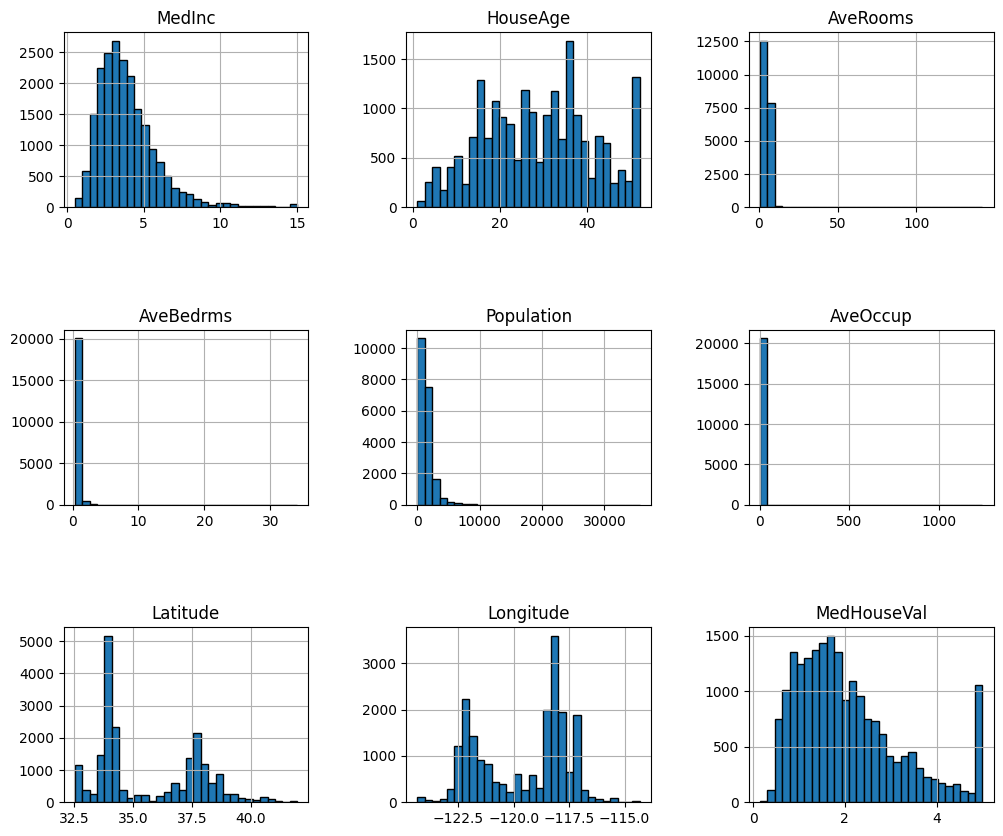

In [141]:
# Vamos analisar a distribuição desses recursos traçando seus histogramas.

import matplotlib.pyplot as plt

california_housing.frame.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [142]:
# Focando na média de aposentos, média de quartos, ocupação média e população, a gama de dados é grande, 
# com compartimentos imperceptíveis para os valores maiores. Isso significa que existem valores muito altos 
# e poucos (talvez possam ser considerados outliers?). 
# Podemos ver essa especificidade observando as estatísticas desses recursos:

features_of_interest = ["AveRooms", "AveBedrms", "AveOccup", "Population"]
california_housing.frame[features_of_interest].describe()

,AveRooms,AveBedrms,AveOccup,Population
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,5.429000,1.096675,3.070655,1425.476744
std,2.474173,0.473911,10.386050,1132.462122
min,0.846154,0.333333,0.692308,3.000000
25%,4.440716,1.006079,2.429741,787.000000
50%,5.229129,1.048780,2.818116,1166.000000
75%,6.052381,1.099526,3.282261,1725.000000
max,141.909091,34.066667,1243.333333,35682.000000


In [83]:
# Instalar o pacote de visualização seaborn
# !pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 4.5 MB/s eta 0:00:00 MB/s eta 0:00:01

[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: /usr/bin/python3 -m pip install --upgrade pip


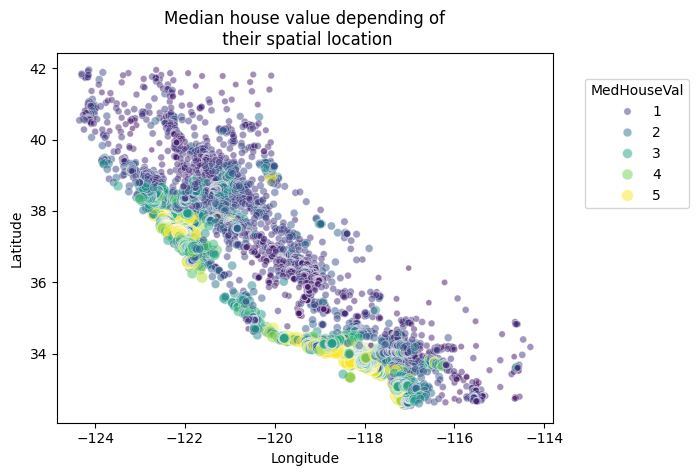

In [143]:
import seaborn as sns

sns.scatterplot(
    data=california_housing.frame,
    x="Longitude",
    y="Latitude",
    size="MedHouseVal",
    hue="MedHouseVal",
    palette="viridis",
    alpha=0.5,
)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 0.95), loc="upper left")
_ = plt.title("Median house value depending of\n their spatial location")

In [85]:
#Podemos fazer uma subamostragem aleatória para ter menos pontos de dados para representar graficamente, 
# mas isso ainda pode nos permitir ver essas especificidades

import numpy as np

rng = np.random.RandomState(0)
indices = rng.choice(
    np.arange(california_housing.frame.shape[0]), size=500, replace=False
)

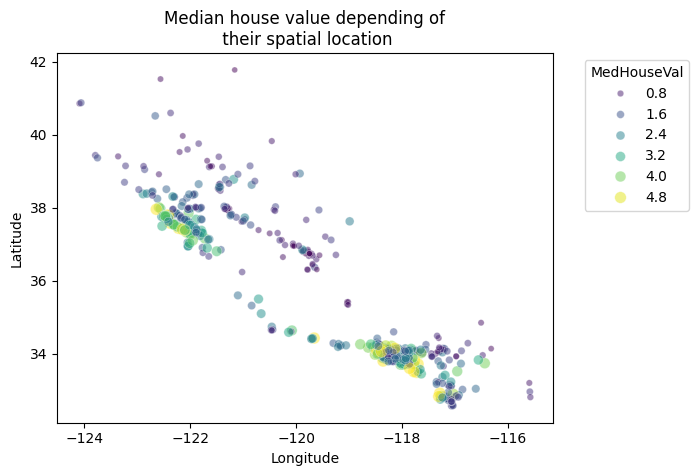

In [86]:
sns.scatterplot(
    data=california_housing.frame.iloc[indices],
    x="Longitude",
    y="Latitude",
    size="MedHouseVal",
    hue="MedHouseVal",
    palette="viridis",
    alpha=0.5,
)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 1), loc="upper left")
_ = plt.title("Median house value depending of\n their spatial location")

In [87]:
# Podemos fazer uma análise final fazendo um gráfico de pares de todas as características e do alvo, 
# mas descartando a longitude e a latitude. 
# Quantizaremos o alvo para que possamos criar um histograma adequado.

import pandas as pd

# Drop the unwanted columns
columns_drop = ["Longitude", "Latitude"]
subset = california_housing.frame.iloc[indices].drop(columns=columns_drop)
# Quantize the target and keep the midpoint for each interval
subset["MedHouseVal"] = pd.qcut(subset["MedHouseVal"], 6, retbins=False)
subset["MedHouseVal"] = subset["MedHouseVal"].apply(lambda x: x.mid)

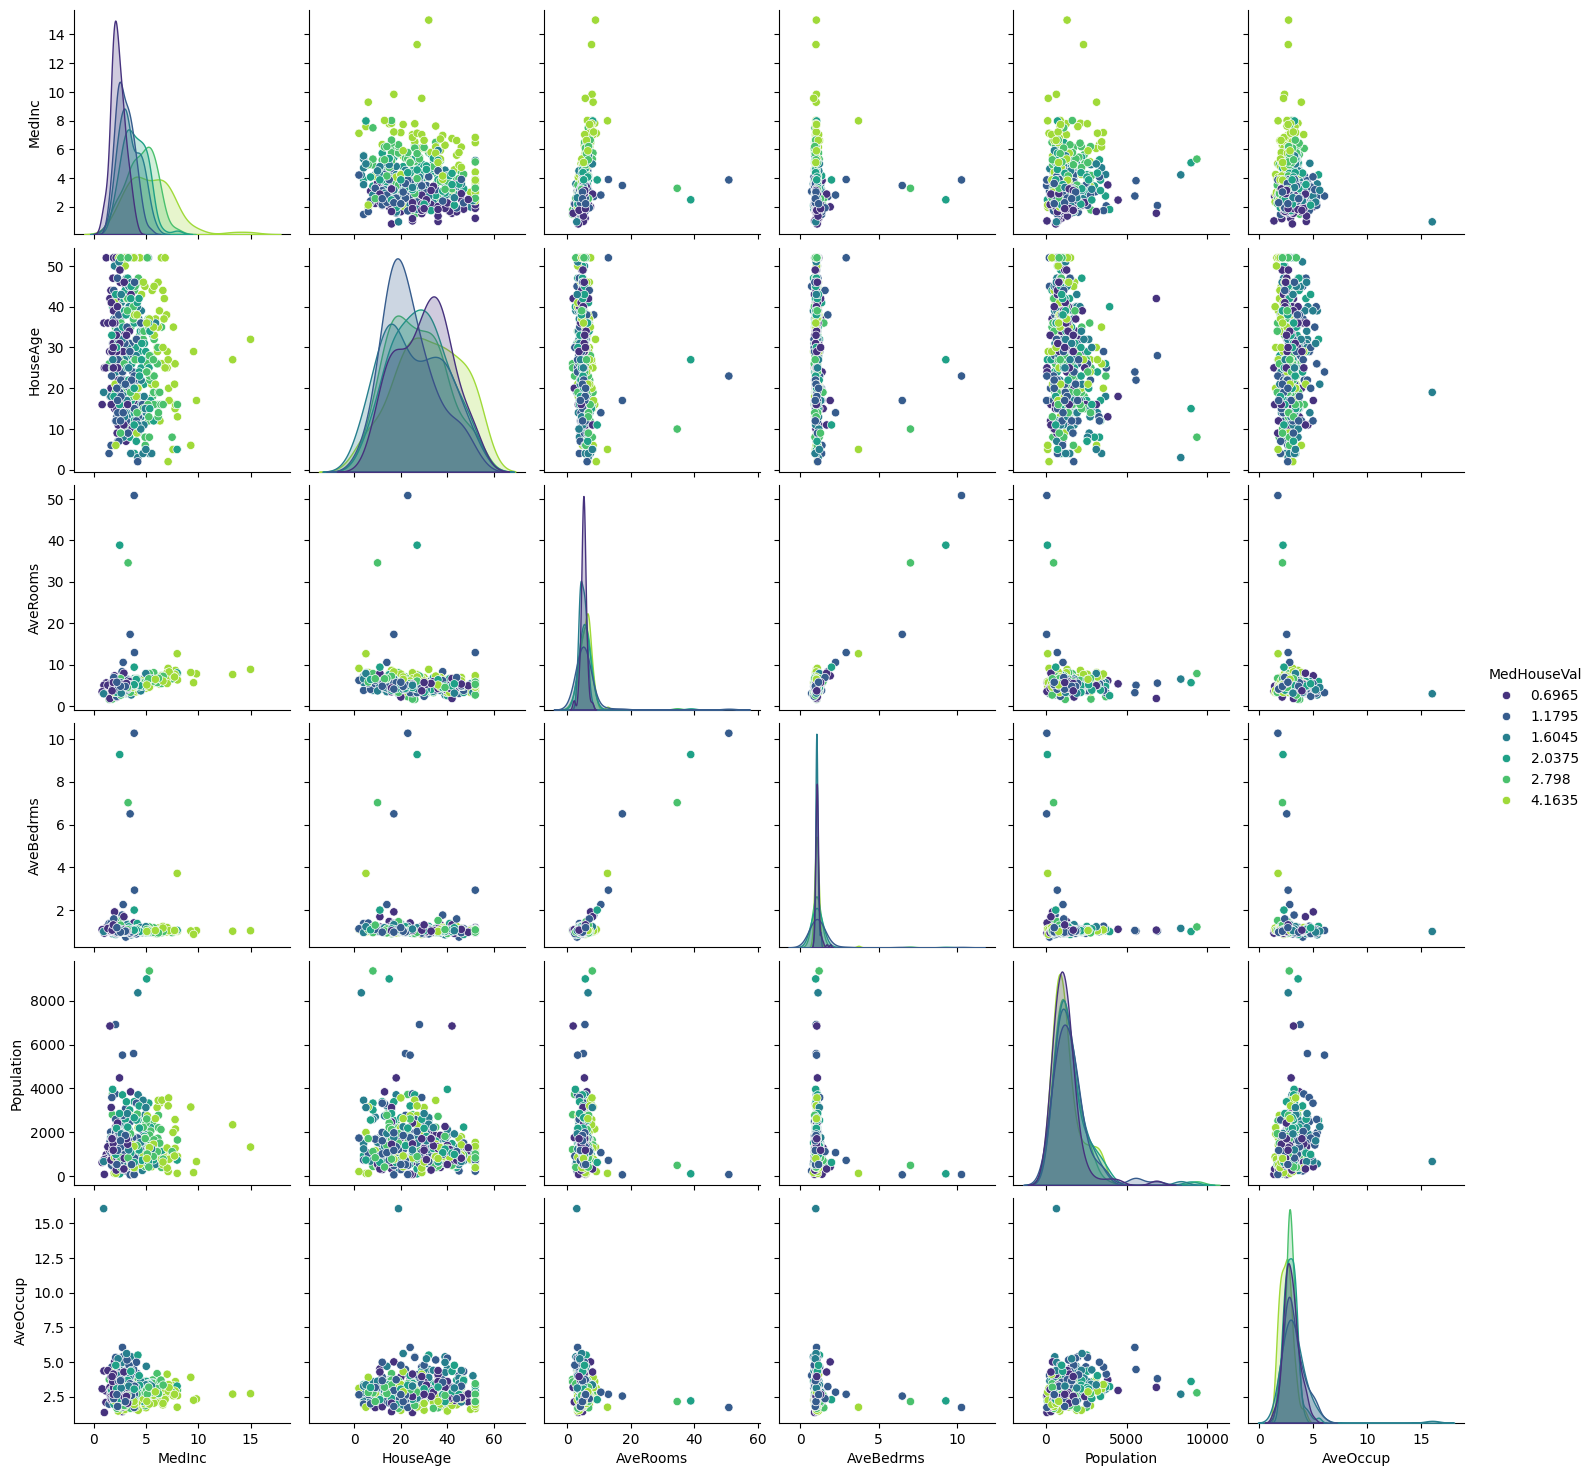

In [88]:
_ = sns.pairplot(data=subset, hue="MedHouseVal", palette="viridis")

In [89]:
# Criamos um modelo preditivo linear e mostramos os valores dos coeficientes obtidos via validação cruzada.

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

alphas = np.logspace(-3, 1, num=30)
model = make_pipeline(StandardScaler(), RidgeCV(alphas=alphas))
cv_results = cross_validate(
    model,
    california_housing.data,
    california_housing.target,
    return_estimator=True,
    n_jobs=2,
)

In [90]:
score = cv_results["test_score"]
print(f"R2 score: {score.mean():.3f} ± {score.std():.3f}")

R2 score: 0.553 ± 0.062


In [91]:
import pandas as pd

coefs = pd.DataFrame(
    [est[-1].coef_ for est in cv_results["estimator"]],
    columns=california_housing.feature_names,
)

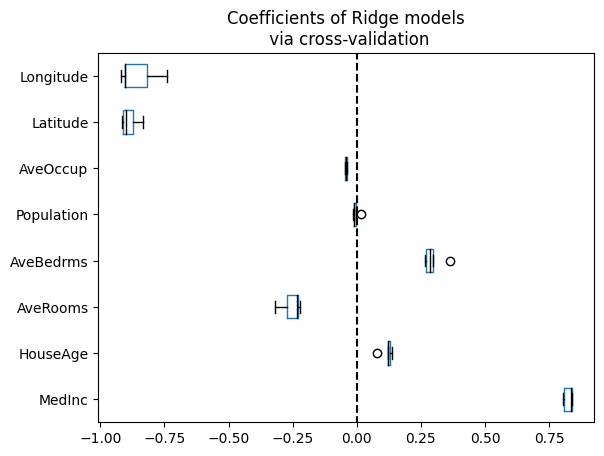

In [92]:
# Parece que os três recursos que identificamos anteriormente são considerados importantes por este modelo. 
# Mas tenha cuidado ao interpretar esses coeficientes.

color = {"whiskers": "black", "medians": "black", "caps": "black"}
coefs.plot.box(vert=False, color=color)
plt.axvline(x=0, ymin=-1, ymax=1, color="black", linestyle="--")
_ = plt.title("Coefficients of Ridge models\n via cross-validation")

In [144]:
# Importando o módulo de regressão linear 
from sklearn.linear_model import LinearRegression

In [145]:
# Convertendo o dataset em um DataFrame pandas
df = pd.DataFrame(california_housing.data)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [146]:
# Adicionando o preço médio da casa ao DataFrame
df['MedHouseVal'] = california_housing.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [147]:
# Não queremos o preço médio da casa como variável dependente
X = df.drop('MedHouseVal', axis = 1)

In [148]:
# Definindo Y
Y = df.MedHouseVal

In [149]:
# Criando o objeto de regressão linear
regr = LinearRegression()

In [150]:
# Tipo do objeto
type(regr)

sklearn.linear_model._base.LinearRegression

In [151]:
# Treinando o modelo
regr.fit(X, Y)

LinearRegression()

In [152]:
# Coeficientes
print("Coeficiente: ", regr.intercept_)
print("Número de Coeficientes: ", len(regr.coef_))

Coeficiente:  -36.94192020718441
Número de Coeficientes:  8


In [153]:
# Prevendo o preço da casa
regr.predict(X)

array([4.13164983, 3.97660644, 3.67657094, ..., 0.17125141, 0.31910524,
       0.51580363])

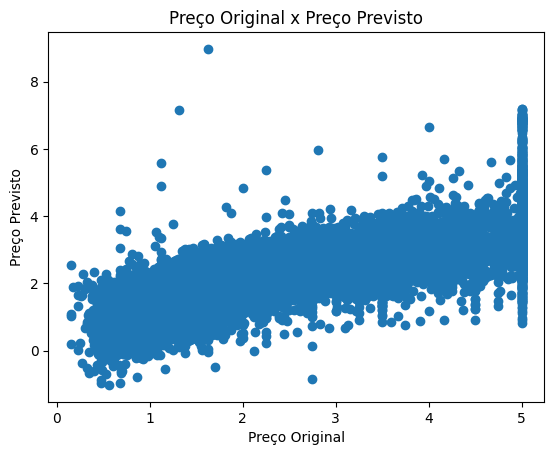

In [154]:
# Comparando preços originais x preços previstos
plt.scatter(df.MedHouseVal, regr.predict(X))
plt.xlabel("Preço Original")
plt.ylabel("Preço Previsto")
plt.title("Preço Original x Preço Previsto")
plt.show()

In [155]:
# Dividindo X em dados de treino e de teste
X_treino = X[:-50]
X_teste = X[-50:]

# Dividindo Y em dados de treino e de teste
Y_treino = df.MedHouseVal[:-50]
Y_teste = df.MedHouseVal[-50:]

# Imprimindo o shape dos datasets
print(X_treino.shape, X_teste.shape, Y_treino.shape, Y_teste.shape)

(20590, 8) (50, 8) (20590,) (50,)


In [156]:
from sklearn.model_selection import train_test_split

In [157]:
# Dividindo X e Y em dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, df.MedHouseVal, test_size = 0.33, random_state = 5)

In [158]:
# Imprimindo o shape dos datasets
print(X_treino.shape, X_teste.shape, Y_treino.shape, Y_teste.shape)

(13828, 8) (6812, 8) (13828,) (6812,)


In [159]:
# Construindo um modelo de regressão
regr = LinearRegression()

In [160]:
# Treinando o modelo
regr.fit(X_treino, Y_treino)

LinearRegression()

In [161]:
# Definindo os dados de treino e teste
pred_treino = regr.predict(X_treino)
pred_teste = regr.predict(X_teste)

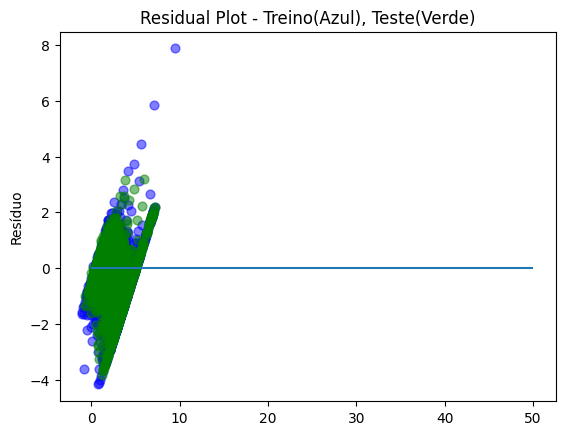

In [162]:
# Comparando preços originais (pontos azuis) x preços previstos (pontos verdes)
plt.scatter(regr.predict(X_treino), regr.predict(X_treino) - Y_treino, c = 'b', s = 40, alpha = 0.5)
plt.scatter(regr.predict(X_teste), regr.predict(X_teste) - Y_teste, c = 'g', s = 40, alpha = 0.5)
plt.hlines(y = 0, xmin = 0, xmax = 50)
plt.ylabel("Resíduo")
plt.title("Residual Plot - Treino(Azul), Teste(Verde)")
plt.show()

## Previsão do Preço da Pizza

In [167]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [169]:
df = pd.read_csv('datasets/pizza-price.csv')
df

,Restaurant,Extra Cheeze,Extra Mushroom,Size by Inch,Extra Spicy,Price
0,A,yes,yes,12,no,650
1,B,no,yes,15,yes,800
2,C,no,no,9,no,500
3,D,yes,no,12,yes,700
4,E,yes,no,12,yes,750
5,F,no,yes,15,yes,900
6,G,yes,no,9,no,600
7,H,yes,no,9,yes,700
8,I,no,yes,15,no,750
9,J,no,yes,15,no,700


In [170]:
corr = df.corr()
corr.style.background_gradient(cmap='Reds')

/tmp/ipykernel_1740894/624952524.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,Size by Inch,Price
Size by Inch,1.000000,0.681904
Price,0.681904,1.000000


In [171]:
# Visualizando os tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Restaurant      20 non-null     object
 1   Extra Cheeze    20 non-null     object
 2   Extra Mushroom  20 non-null     object
 3    Size by Inch   20 non-null     int64 
 4   Extra Spicy     20 non-null     object
 5   Price           20 non-null     int64 
dtypes: int64(2), object(4)
memory usage: 1.1+ KB


In [173]:
# Verificando valors Null
# Ou seja, o dataset não possui valores Null
df.isnull().sum()

Restaurant        0
Extra Cheeze      0
Extra Mushroom    0
 Size by Inch     0
Extra Spicy       0
Price             0
dtype: int64

In [184]:
# Describing the data
df.describe()

,Size by Inch,Price
count,20.000000,20.000000
mean,11.600000,727.500000
std,2.500526,130.257841
min,8.000000,500.000000
25%,9.000000,650.000000
50%,12.000000,700.000000
75%,12.750000,762.500000
max,15.000000,1000.000000


In [185]:
# shape dos dados
# dataset de 20 linhas x 6 colunas
df.shape

(20, 6)

yes    12
no      8
Name: Extra Cheeze, dtype: int64


<AxesSubplot: ylabel='Extra Cheeze'>

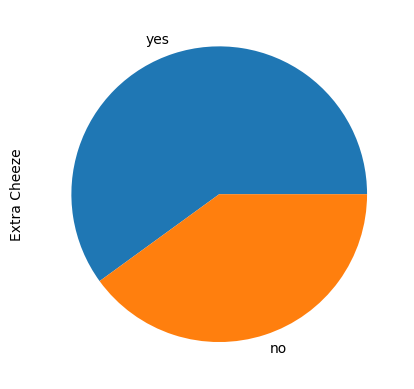

In [186]:
# Pizza que tem Extra Cheeze
print(df['Extra Cheeze'].value_counts())
df['Extra Cheeze'].value_counts().plot.pie()

yes    11
no      9
Name: Extra Mushroom, dtype: int64


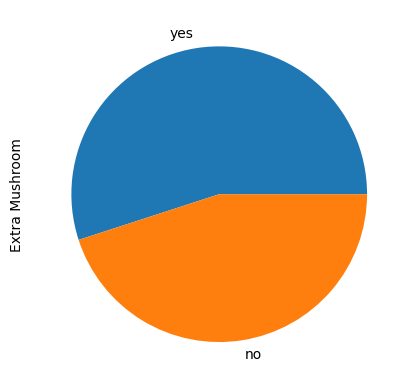

In [187]:
# Pizza que tem Extra Mushroom
print(df['Extra Mushroom'].value_counts())
df['Extra Mushroom'].value_counts().plot.pie();

no     11
yes     9
Name: Extra Spicy, dtype: int64


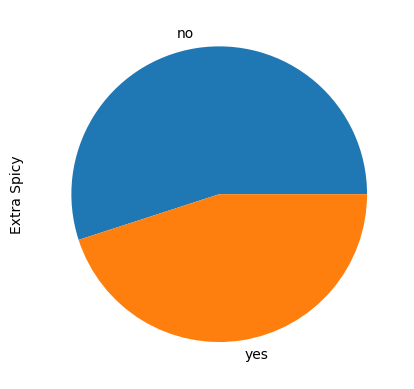

In [188]:
# Pizza que tem Extra Spicy
print(df['Extra Spicy'].value_counts())
df['Extra Spicy'].value_counts().plot.pie();

12    8
15    5
9     5
8     2
Name:  Size by Inch, dtype: int64


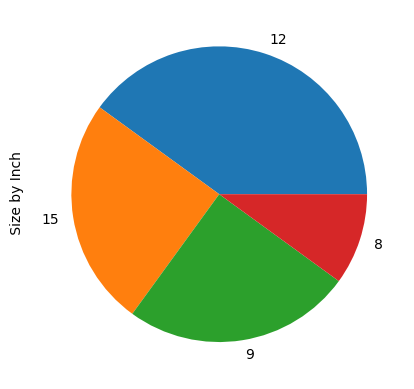

In [189]:
# Contagem de pizzas com mesmo tamanho
print(df[' Size by Inch'].value_counts())
df[' Size by Inch'].value_counts().plot.pie();

700     6
750     3
650     2
900     2
600     2
800     1
500     1
550     1
1000    1
950     1
Name: Price, dtype: int64
Total money spent by customer:  14550


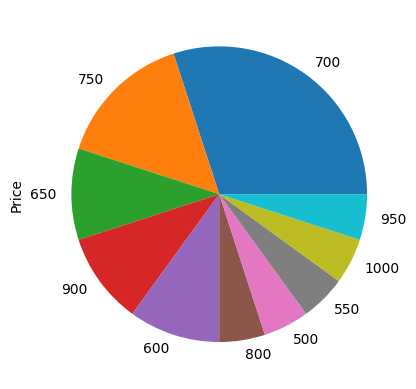

In [190]:
# Dinheiro gasto pelos clientes
print(df['Price'].value_counts())
df['Price'].value_counts().plot.pie();
print('Total money spent by customer: ', df['Price'].sum())

 Size by Inch  8   9   12  15
Price                        
500             0   1   0   0
550             1   0   0   0
600             1   1   0   0
650             0   1   1   0
700             0   2   3   1
750             0   0   2   1
800             0   0   0   1
900             0   0   1   1
950             0   0   1   0
1000            0   0   0   1


Size by Inch,8,9,12,15
Size by Inch,,,,
8,1.000000,0.000000,-0.408248,-0.500000
9,0.000000,1.000000,0.456435,-0.149071
12,-0.408248,0.456435,1.000000,0.408248
15,-0.500000,-0.149071,0.408248,1.000000


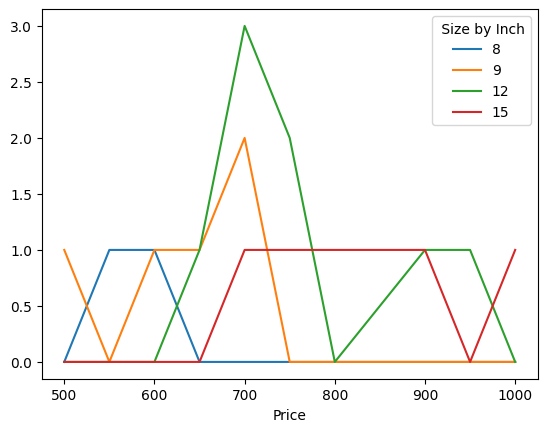

In [191]:
sizeprice = pd.crosstab(index = df['Price'], columns = df[' Size by Inch'])
print(sizeprice)
sizeprice.plot.line();
corr = sizeprice.corr()
corr.style.background_gradient(cmap='Blues')

Extra Cheeze  no  yes
Price                
500            1    0
550            0    1
600            0    2
650            1    1
700            2    4
750            1    2
800            1    0
900            1    1
950            0    1
1000           1    0


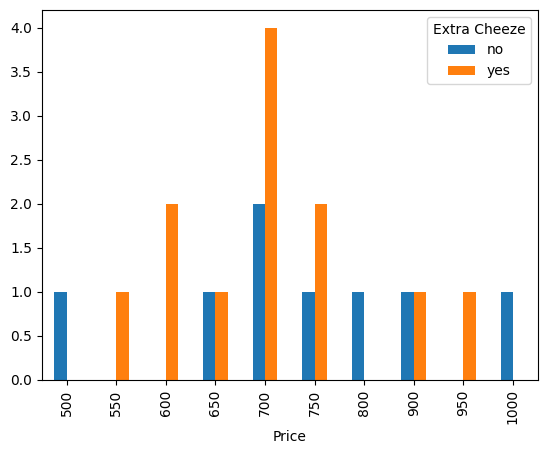

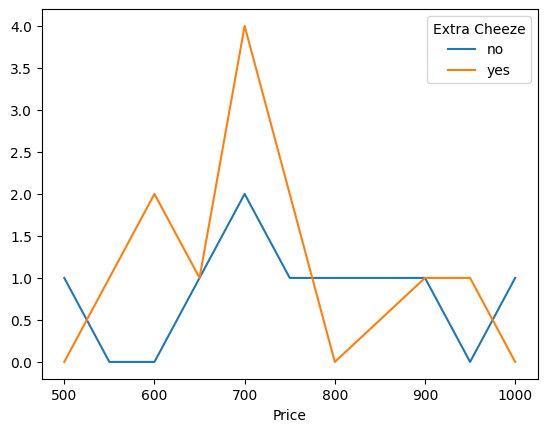

In [192]:
# CHEEZE x PRICE
cheezeprice = pd.crosstab(index = df['Price'], columns = df['Extra Cheeze'])
print(cheezeprice)
cheezeprice.plot.bar();
cheezeprice.plot.line();

Extra Mushroom  no  yes
Price                  
500              1    0
550              0    1
600              1    1
650              1    1
700              5    1
750              1    2
800              0    1
900              0    2
950              0    1
1000             0    1


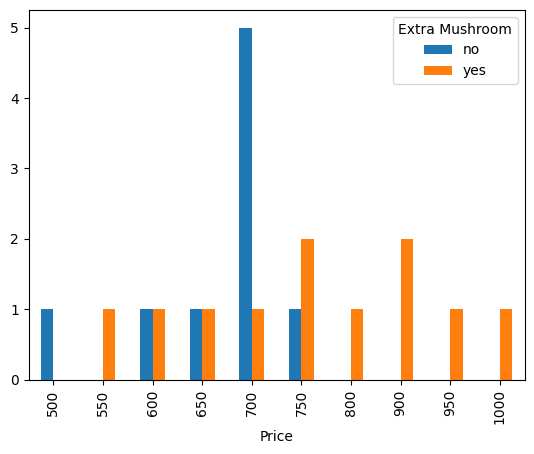

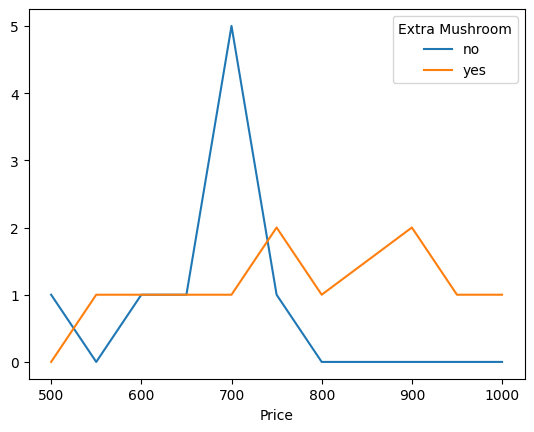

In [193]:
# MUSHROOM x PRIZE
mushprice = pd.crosstab(index = df['Price'], columns = df['Extra Mushroom'])
print(mushprice)
mushprice.plot.bar();
mushprice.plot.line();

Extra Spicy  no  yes
Price               
500           1    0
550           1    0
600           2    0
650           2    0
700           3    3
750           2    1
800           0    1
900           0    2
950           0    1
1000          0    1


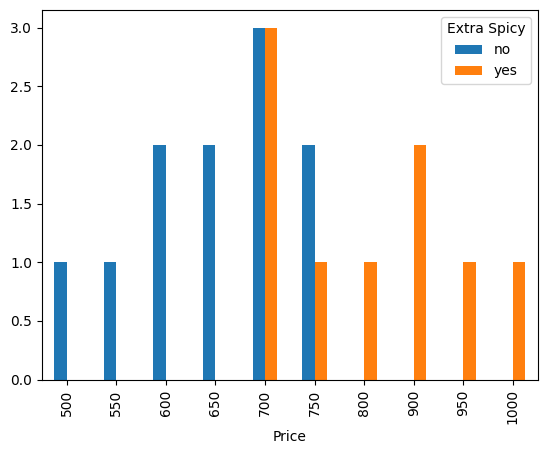

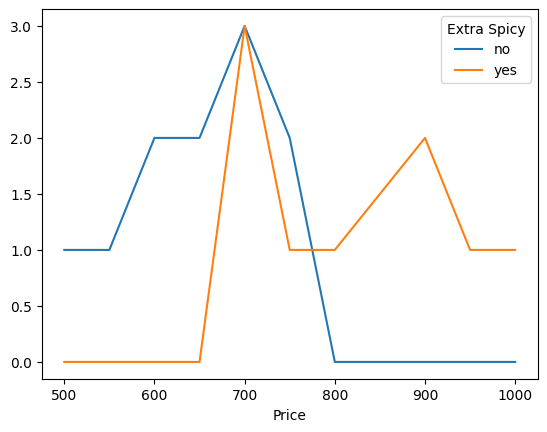

In [194]:
# SPICY x PRIZE
spiceprice = pd.crosstab(index = df['Price'], columns = df['Extra Spicy'])
print(spiceprice)
spiceprice.plot.bar();
spiceprice.plot.line();

In [195]:
# Após uma análise exploratório dos dados
# Vamos dividir os dados em treino e teste
# Dividindo YES/NO em 1/0
df.replace(('yes', 'no'), (1, 0), inplace=True)
df

,Restaurant,Extra Cheeze,Extra Mushroom,Size by Inch,Extra Spicy,Price
0,A,1,1,12,0,650
1,B,0,1,15,1,800
2,C,0,0,9,0,500
3,D,1,0,12,1,700
4,E,1,0,12,1,750
5,F,0,1,15,1,900
6,G,1,0,9,0,600
7,H,1,0,9,1,700
8,I,0,1,15,0,750
9,J,0,1,15,0,700


In [196]:
corr = df.corr()
corr.style.background_gradient(cmap='Greens')

/tmp/ipykernel_1740894/3657995980.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,Extra Cheeze,Extra Mushroom,Size by Inch,Extra Spicy,Price
Extra Cheeze,1.000000,-0.123091,-0.510894,-0.082061,-0.144701
Extra Mushroom,-0.123091,1.000000,0.470104,0.010101,0.433412
Size by Inch,-0.510894,0.470104,1.000000,0.395877,0.681904
Extra Spicy,-0.082061,0.010101,0.395877,1.000000,0.674856
Price,-0.144701,0.433412,0.681904,0.674856,1.000000


In [197]:
# Variáveis preditoras ou independentes. Correspondem aos Atributos
features = ['Extra Cheeze', 'Extra Mushroom', 'Extra Spicy', ' Size by Inch']
x = df[features]

# Variável dependente. É nossa Variável target
y = df['Price']

In [198]:
# Importando as bibliotecas e módulos
from sklearn.model_selection import train_test_split

# Em resumo, random_state é um parâmetro na função train_test_split que controla o gerador de números 
# aleatórios usado para embaralhar os dados antes de dividi-los.
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 1/4, random_state = 4)

In [201]:
# Importando a biblioteca para Accuracy Score
from sklearn.metrics import accuracy_score

# Importando a biblioteca
from sklearn.linear_model import LogisticRegression

# Inicializando o classificador
logisreg = LogisticRegression()

# Treinando o modelo com dados de treino
logisreg.fit(x_train, y_train)

# Prevendo com dados de teste
y_pred = logisreg.predict(x_test)

# Calculando a acurácia do modelo comparando y_test e y_pred
acc_logisreg = accuracy_score(y_test, y_pred)
print( 'Acurácia do modelo de Regressão Logística: ', acc_logisreg )

Acurácia do modelo de Regressão Logística:  0.4


/home/igor/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [217]:
# Importando a biblioteca Análise discriminante linear

# Análise discriminante linear, análise discriminante normal ou análise de função discriminante 
# é uma generalização do discriminante linear de Fisher, um método usado em estatística e outros campos, 
# para encontrar uma combinação linear de recursos que caracteriza ou separa duas ou mais classes de objetos 
# ou eventos.

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score


# Inicializando o classificador
lda = LinearDiscriminantAnalysis()

# Treinando o modelo com dados de treino
lda.fit(x_train, y_train)

# Prevendo com dados de teste
lda_pred = lda.predict(x_test)

# Calculando a acurácia do modelo comparando y_test e lda_pred
acc_lda = accuracy_score(y_test, lda_pred)
print( 'Acurácia do Classificador Análise Discriminante Linear: ', acc_lda )

Accuracy of Linear Discriminant Analysis Classifier:  0.2


In [210]:
# Importando a biblioteca Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

# Inicializando o classificador
gnb = GaussianNB()

# Treinando o modelo com dados de treino
gnb.fit(x_train, y_train)

# Prevendo com dados de teste
gnb_pred = gnb.predict(x_test)

# Calculando a acurácia do modelo comparando y_test e gnb_pred
acc_ganb = accuracy_score(y_test, gnb_pred)
print( 'Accuracy of Gaussian Naive Bayes : ', acc_ganb )

Accuracy of Gaussian Naive Bayes :  0.2


In [211]:
# Importando a biblioteca Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Inicializando o classificador
dtc = DecisionTreeClassifier()

# Treinando o modelo com dados de treino
dtc.fit(x_train, y_train)

# Prevendo com dados de teste
dtc_pred = dtc.predict(x_test)

# Calculate Model accuracy by comparing y_test and dtc_pred
acc_dtree = accuracy_score(y_test, dtc_pred)
print( 'Accuracy of  Decision Tree Classifier : ', acc_dtree )

Accuracy of  Decision Tree Classifier :  0.0


In [212]:
# Importando a biblioteca Random Forest
from sklearn.ensemble import RandomForestClassifier

# Inicializando o classificador
rfc = RandomForestClassifier()

# Treinando o modelo com dados de treino
rfc.fit(x_train, y_train)

# Prevendo com dados de teste
rfc_pred = rfc.predict(x_test)

# Calculando a acurácia do modelo comparando y_test e rfc_pred
acc_rf = accuracy_score(y_test, rfc_pred)
print( 'Accuracy of  Random Forest : ', acc_rf )

Accuracy of  Random Forest :  0.2


In [213]:
# Importando a biblioteca Support Vector Machine
from sklearn import svm

# Inicializando o classificador
svmodel = svm.SVC()

# Treinando o modelo com dados de treino
svmodel.fit(x_train, y_train)

# Prevendo com dados de teste
svm_pred = svmodel.predict(x_test)

# Calculando a acurácia do modelo comparando y_test e svm_pred
acc_svc = accuracy_score(y_test, svm_pred)
print( 'Accuracy of Support Vector Classifier: ', acc_svc )

Accuracy of Support Vector Classifier:  0.4


In [214]:
# Importando a biblioteca K Nearest Neighbour Model
from sklearn.neighbors import KNeighborsClassifier

# Inicializando o modelo K Nearest Neighbour com valor padrão de núcleos K=5
knnmodel = KNeighborsClassifier()

# Treinando o modelo com dados de treino
knnmodel.fit(x_train, y_train)

# Prevendo com dados de teste
knn_pred = knnmodel.predict(x_test)

# Calculando a acurácia do modelo comparando y_test e knn_pred
acc_knn = accuracy_score(y_test, knn_pred)
print( 'Accuracy of KNN Classifier: ', acc_knn )

Accuracy of KNN Classifier:  0.2


In [215]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Linear Discriminant Analysis','Naive Bayes', 'Decision Tree', 'Random Forest', 'Support Vector Machines', 
              'K - Nearest Neighbors'],
    'Score': [acc_logisreg, acc_lda, acc_ganb, acc_dtree, acc_rf, acc_svc, acc_knn]})

models.sort_values(by='Score', ascending=False)

,Model,Score
0,Logistic Regression,0.4
5,Support Vector Machines,0.4
1,Linear Discriminant Analysis,0.2
2,Naive Bayes,0.2
4,Random Forest,0.2
6,K - Nearest Neighbors,0.2
3,Decision Tree,0.0


In [216]:
# Fazendo previsões para cada modelo treinado

print('Price Predictions using Logistic Regression Model: ', logisreg.predict([[1,0,1,11]]))

print('Price Predictions using LDA Model: ', lda.predict([[1,0,1,11]]))

print('Price Predictions using Gaussian Naive Bayes Model: ', gnb.predict([[1,0,1,11]]))

print('Price Predictions using Decision Tree Model: ', dtc.predict([[1,0,1,11]]))

print('Price Predictions using Random Forest Model: ', rfc.predict([[1,0,1,11]]))

print('Price Predictions using SVM Model: ', svmodel.predict([[1,0,1,11]]))

print('Price Predictions using KNN Model: ', knnmodel.predict([[1,0,1,11]]))

Price Predictions using Logistic Regression Model:  [700]
Price Predictions using LDA Model:  [700]
Price Predictions using Gaussian Naive Bayes Model:  [700]
Price Predictions using Decision Tree Model:  [750]
Price Predictions using Random Forest Model:  [750]
Price Predictions using SVM Model:  [700]
Price Predictions using KNN Model:  [700]


/home/igor/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/igor/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/home/igor/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/home/igor/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/igor/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/igor/.local/lib/python3.10/site-packages/sklea

## Fim